***<p style='color:red'>Predictive Analysis of Mushroom Classification Using Machine Learning Approach</p>***

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
df= pd.read_csv(r"E:\mushrooms.csv")

In [58]:
df.shape

(8124, 23)

In [59]:
df.size

186852

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
df.sample(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2441,e,x,y,g,t,n,f,c,b,w,...,s,p,p,p,w,o,p,k,y,d
6661,p,x,s,n,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
1479,e,x,f,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,s,g


In [62]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [110]:
df['class'].unique()

array(['p', 'e'], dtype=object)

***<font color="green">1st step:   Split the dataset into train & test</font>***

In [67]:
X = df.drop(columns=['class']) 
y = df['class']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


***<font color="green">2nd step: Apply One Hot Encoding on categorical columns</font>***

In [69]:
X_categorical= X.select_dtypes(include=['object']).columns
print(X_categorical.dtype)

obj_ohe= OneHotEncoder(sparse_output=False,drop='first')
X_train_trans = obj_ohe.fit_transform(X_train[X_categorical])
print(X_train_trans[0:1])
X_test_trans = obj_ohe.transform(X_test[X_categorical])
X_test_trans.shape

object
[[0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


(1625, 95)

***<font color="green">3rd step: Apply Label Encoding on target column</font>***

In [70]:
obj_Le = LabelEncoder()
y_train_trans =obj_Le.fit_transform(y_train)
print(y_train_trans[0:1])
y_test_trans =obj_Le.transform(y_test)
y_test_trans.shape

[1]


(1625,)

## Here I am applying two different models: 
+ KNN
+ Decision Tree

***<font color="green">4th step: Apply Model <font color="red">DecisionTreeClassifier</font></font>***

In [71]:
obj_DTC = DecisionTreeClassifier()
obj_DTC.fit(X_train_trans,y_train_trans)

DecisionTreeClassifier()

In [72]:
y_pred = obj_DTC.predict(X_test_trans)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

***<font color="green">5th step: Compare accuracy from y_test_trans to y_pred  and display final accuracy of the model</font>***

In [77]:
accuracy= accuracy_score(y_test_trans,y_pred)
print(f"Accuracy of the DecisionTreeClassifier() is {accuracy: .2f}")

Accuracy of the DecisionTreeClassifier() is  1.00


***<font color="green">6th step: Generate Classification Report</font>***

In [80]:
report = classification_report(y_test_trans, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



***<font color="green">7th step: Display Confusion Matrix </font>***

In [84]:
conf_matrix = confusion_matrix(y_test_trans, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[843   0]
 [  0 782]]


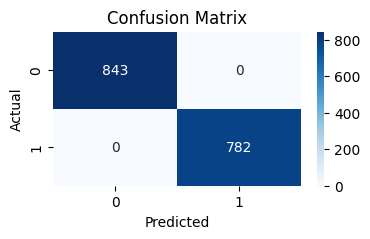

In [95]:
labels = sorted(set(y_test_trans) | set(y_pred))
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***<font color="green">8th step: Apply MODEL <font color="red">KNeighborsClassifier</font> </font>***

In [99]:
obj_KNN = KNeighborsClassifier(n_neighbors=3)
obj_KNN.fit(X_train_trans,y_train_trans)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred_KNN = obj_KNN.predict(X_test_trans)
y_pred_KNN

array([0, 1, 1, ..., 1, 1, 1])

***<font color="green">9th step: Compare accuracy from y_test_trans to y_pred  and display final accuracy of the model</font>***

In [104]:
accuracy_KNN= accuracy_score(y_test_trans,y_pred_KNN)
print(f"Accuracy of the KNeighborsClassifier is {accuracy_KNN: .3f}")

Accuracy of the KNeighborsClassifier is  1.000


***<font color="green">10th step: Generate Classification Report</font>***

In [105]:
report = classification_report(y_test_trans, y_pred_KNN)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



***<font color="green">11th step: Display Confusion Matrix of KNN Model</font>***

In [107]:
conf_matrix = confusion_matrix(y_test_trans, y_pred_KNN)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[843   0]
 [  0 782]]


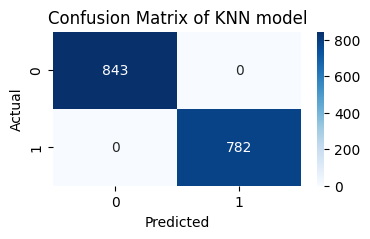

In [109]:
labels = sorted(set(y_test_trans) | set(y_pred_KNN))
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of KNN model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()